In [82]:
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import h5py
import os
import pandas as pd
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from scipy.io import loadmat




def load_dynamic_rdms(dynamic_rdm_dir):
    rdms = np.load(dynamic_rdm_dir)
    return rdms

def compute_dynamic_behavioral_correlation(dynamic_rdms, behavioral_rdm):
    global model_timepoints_list
    correlations = []
    print(dynamic_rdms.shape)
    for i in tqdm(range(len(dynamic_rdms)), desc = 'Computing dynamic behavioral correlations'):
        dynamic_rdm = dynamic_rdms[i]
        dynamic_rdm_flat = dynamic_rdm[np.triu_indices(dynamic_rdm.shape[0], k=1)]
        behavioral_rdm_flat = behavioral_rdm[np.triu_indices(behavioral_rdm.shape[0], k=1)]
        correlation, _ = spearmanr(dynamic_rdm_flat, behavioral_rdm_flat)
        correlations.append(correlation)
    return correlations

def compute_static_behavioral_correlation(static_rdm, behavioral_rdm):
    assert static_rdm.shape == behavioral_rdm.shape, f'Static RDM and behavioral RDM must have the same shape, got {static_rdm.shape} and {behavioral_rdm.shape}'
    static_rdm_flat = static_rdm[np.triu_indices(static_rdm.shape[0], k=1)]
    behavioral_rdm_flat = behavioral_rdm[np.triu_indices(behavioral_rdm.shape[0], k=1)]
    correlation, _ = spearmanr(static_rdm_flat, behavioral_rdm_flat)
    return correlation
        

def compute_auc(correlations, model_ms_step):
    return np.trapz(correlations, dx=model_ms_step)

def ms_to_timepoints(ms, ms_start=-100, ms_step=5):
    timepoint = (ms - ms_start) // ms_step
    return timepoint

# 48 Validation Objects

In [83]:
# # spose RDM
# spose48_rdm = np.array(loadmat("../Data/RDM48_triplet.mat")['RDM48_triplet'])
# spose48_rdm.shape

# # HBA Dynamic
# hba_dynamic_rdms_dir = "../../output/cliphba_dynamic_v3/things48/rdm"
# hba_dynamic_rdms = load_dynamic_rdms(hba_dynamic_rdms_dir)

# # Baseline Dynamic
# baseline_dynamic_rdms_dir = "../../output/baseline_dynamic_v3/things48/rdm"
# baseline_dynamic_rdms = load_dynamic_rdms(baseline_dynamic_rdms_dir)

# # HBA static
# hba_static_rdm_path = "../../output/cliphba/things48/rdm/static_rdm.hdf5"
# with h5py.File(hba_static_rdm_path, 'r') as f:
#     hba_static_rdm = f['rdm'][:]

# # Baseline static
# baseline_static_rdm_path = "../../output/baseline_static/things48/rdm/static_rdm.hdf5"
# with h5py.File(baseline_static_rdm_path, 'r') as f:
#     baseline_static_rdm = f['rdm'][:]

# # MEG RDM
# meg_rdm = "../Data/ThingsMEG_RDMs/THingsMEG_RDM_4P.npy"
# meg_rdm = np.load(meg_rdm)
# meg_rdm = np.nan_to_num(meg_rdm)
# meg_rdm = np.mean(meg_rdm, axis=0)

# meg_index = []
# for i in model_timepoints_list:
#     meg_index.append(ms_to_timepoints(i))
# meg_rdm_48 = meg_rdm[meg_index, :, :]

# index48 = pd.read_csv("../Data/hebart66_embedding_rescaled_48val.csv", index_col=0).index
# meg_rdm_48 = meg_rdm_48[:, index48, :][:, :, index48]


# # reorder the rdm to match the order of the sample48

# sample48 = pd.DataFrame(loadmat("../Data/words48.mat")['words48'])
# sample48 = sample48.astype(str).apply(lambda x: x.str.strip('[]'))
# sample48 = sample48.applymap(lambda x: x[1:-1])
# sample48 = sample48.replace(' ', '_', regex=True)
# sample48 = sample48.replace('camera', 'camera1', regex=True)
# sample48 = sample48.replace('file', 'file1', regex=True)

# order_list = list(sample48[0])


# name_df = pd.read_csv("../Data/things48_image_names.csv")
# name_df['image_name'] = name_df['image_name'].apply(lambda x: x[:-8])

# # find list of index from name_df basedo nn sample48
# index_list = []
# for i in range(48):
#     index_list.append(name_df[name_df['image_name'] == order_list[i]].index[0])

# hba_static_rdm = hba_static_rdm[index_list][:, index_list]
# baseline_static_rdm = baseline_static_rdm[index_list][:, index_list]
# hba_dynamic_rdms = hba_dynamic_rdms[:, index_list][:, :, index_list]
# baseline_dynamic_rdms = baseline_dynamic_rdms[:, index_list][:, :, index_list]

# # compute correlations
# hba_dynamic_correlations = compute_dynamic_behavioral_correlation(hba_dynamic_rdms, spose48_rdm)
# baseline_dynamic_correlations = compute_dynamic_behavioral_correlation(baseline_dynamic_rdms, spose48_rdm)
# hba_static_correlation = compute_static_behavioral_correlation(hba_static_rdm, spose48_rdm)
# baseline_static_correlation = compute_static_behavioral_correlation(baseline_static_rdm, spose48_rdm)
# spose_self_correlation = compute_static_behavioral_correlation(spose48_rdm, spose48_rdm)
# meg_corr = compute_dynamic_behavioral_correlation(meg_rdm_48, spose48_rdm)

# # # compute AUCs
# # auc_hba_dynamic = compute_auc(hba_dynamic_correlations, model_ms_step)
# # auc_baseline_dynamic = compute_auc(baseline_dynamic_correlations, model_ms_step)

# # Plotting
# plt.plot(model_timepoints_list, hba_dynamic_correlations, label='CLIP-HBA-Dynamic', color='purple')
# plt.plot(model_timepoints_list, baseline_dynamic_correlations, label='Baseline-Dynamic', color='grey')
# # plt.axhline(hba_static_correlation, label='CLIP-HBA static', color='red', linestyle='--')
# plt.plot(model_timepoints_list, meg_corr, label='MEG 48', color='orange')
# plt.axhline(baseline_static_correlation, label='Baseline static', color='green', linestyle='--')
# plt.xlabel('Time (ms)')
# plt.ylabel('Spearman correlation')
# plt.legend()
# plt.title("SPoSE 48 Validation Set - Behavioral Correlation")
# plt.show()


THINGs 1854

In [84]:
# # Spose
# spose_emb_path = "../Data/hebart66_embedding_rescaled.csv"
# spose_emb = pd.read_csv(spose_emb_path, index_col=0)
# spose_emb = spose_emb.to_numpy()
# spose_rdm = 1 - np.corrcoef(spose_emb)

# # HBA Dynamic
# hba_dynamic_rdms_dir = "../../output/cliphba_dynamic_3d_v7/things/rdms_-100ms-1300ms-5step.npy"
# hba_dynamic_rdms = load_dynamic_rdms(hba_dynamic_rdms_dir)
# model_ms_start = -100
# model_ms_end = 1300
# model_ms_step = 5
# model_timepoints_list = list(range(model_ms_start, model_ms_end + 1, model_ms_step))


# # HBA static
# hba_static_rdm_path = "../../output/cliphba/things/rdm/static_rdm.hdf5"
# # with h5py.File(hba_static_rdm_path, 'r') as f:
# #     hba_static_rdm = f['rdm'][:]

# # Baseline static
# baseline_static_rdm_path = "../../output/baseline_static/things/rdm/static_rdm.hdf5"
# # with h5py.File(baseline_static_rdm_path, 'r') as f:
# #     baseline_static_rdm = f['rdm'][:]

# # meg RDM
# meg_rdm = "../Data/ThingsMEG_RDMs/THingsMEG_RDM_4P.npy"
# meg_rdm = np.load(meg_rdm)
# meg_rdm = np.nan_to_num(meg_rdm)
# meg_rdm = np.mean(meg_rdm, axis=0)

# model_timepoints_list = list(range(-100, 1301, 5))

# meg_index = []
# for i in model_timepoints_list:
#     meg_index.append(ms_to_timepoints(i))
# meg_rdm = meg_rdm[meg_index, :, :]



# # compute correlations
# hba_dynamic_correlations = compute_dynamic_behavioral_correlation(hba_dynamic_rdms, spose_rdm)
# # hba_static_correlation = compute_static_behavioral_correlation(hba_static_rdm, spose_rdm)
# # baseline_static_correlation = compute_static_behavioral_correlation(baseline_static_rdm, spose_rdm)
# # spose_self_correlation = compute_static_behavioral_correlation(spose_rdm, spose_rdm)
# meg_corr = compute_dynamic_behavioral_correlation(meg_rdm, spose_rdm)

# # compute AUCs
# auc_hba_dynamic = compute_auc(hba_dynamic_correlations, model_ms_step)



# # Plotting
# plt.plot(model_timepoints_list, hba_dynamic_correlations, label='CLIP-HBA-Dynamic', color='purple')
# # plt.axhline(hba_static_correlation, label='CLIP-HBA static', color='red', linestyle='--')
# # plt.axhline(baseline_static_correlation, label='Baseline static', color='green', linestyle='--')
# plt.plot(model_timepoints_list, meg_corr, label='Things MEG', color='orange')
# # plt.axhline(spose_self_correlation, label='SPOSE', color='black', linestyle='--')
# # plt.text(0.55, 0.1, f'CLIP-HBA AUC: {auc_hba_dynamic:.2f}\nBaseline Dynamic AUC: {auc_baseline_dynamic:.2f}', transform=plt.gca().transAxes)
# plt.xlabel('Time (ms)')
# plt.ylabel('Spearman correlation')
# plt.legend()
# plt.title('SPoSE 1854 Full Set - Behavioral Correlation')
# plt.show()

In [85]:
# # Spose
# spose_emb_path = "../Data/hebart66_embedding_rescaled.csv"
# spose_emb = pd.read_csv(spose_emb_path, index_col=0)
# spose_emb = spose_emb.to_numpy()
# spose_rdm = 1 - np.corrcoef(spose_emb)

# # HBA Dynamic
# hba_dynamic_rdms_dir = '../../output/cliphba_dynamic_66d_official/things/rdms_-100ms-1300ms-5step.npy'
# start = -100
# step = 5
# end = 1300

# model_timepoints_list = np.arange(start, end+1, step)
# hba_dynamic_rdms = load_dynamic_rdms(hba_dynamic_rdms_dir)

# # HBA static
# hba_static_rdm_path = "../../output/cliphba_66d_official/things/rdm/static_rdm.hdf5"
# with h5py.File(hba_static_rdm_path, 'r') as f:
#     hba_static_rdm = f['rdm'][:]

# # Baseline static
# baseline_static_rdm_path = "../../output/baseline_static_vit/things/rdm/static_rdm.hdf5"
# with h5py.File(baseline_static_rdm_path, 'r') as f:
#     baseline_static_rdm = f['rdm'][:]





# # compute correlations
# hba_static_correlation = compute_static_behavioral_correlation(hba_static_rdm, spose_rdm)
# hba_dynamic_correlations = compute_dynamic_behavioral_correlation(hba_dynamic_rdms, spose_rdm)
# baseline_static_correlation = compute_static_behavioral_correlation(baseline_static_rdm, spose_rdm)



# # Plotting
# plt.axhline(hba_static_correlation, label='CLIP-HBA-Static', color='red', linestyle='--')
# plt.plot(model_timepoints_list, hba_dynamic_correlations, label='CLIP-HBA-Dynamic', color='purple')
# plt.axhline(baseline_static_correlation, label='CLIP-ViT-L/14', color='green', linestyle='--')
# plt.xlabel('Time (ms)')
# plt.ylabel('Spearman correlation')
# plt.legend()
# plt.title('SPoSE 1854 Full Set - Behavioral Correlation')
# plt.text(0.5, -0.2, "noise = 0.5 richness curve,  richness = generalization curve, penalty = richness curve, stepwise training (MSE + Pearson, then G Loss)")
# plt.show()

48 Triplets

(48, 48)
(281, 48, 48)
(48, 48)
(48, 48)
(281, 48, 48)


Computing dynamic behavioral correlations: 100%|██████████| 281/281 [00:00<00:00, 1997.22it/s]


max dynamic correlation 0.6451215452810956


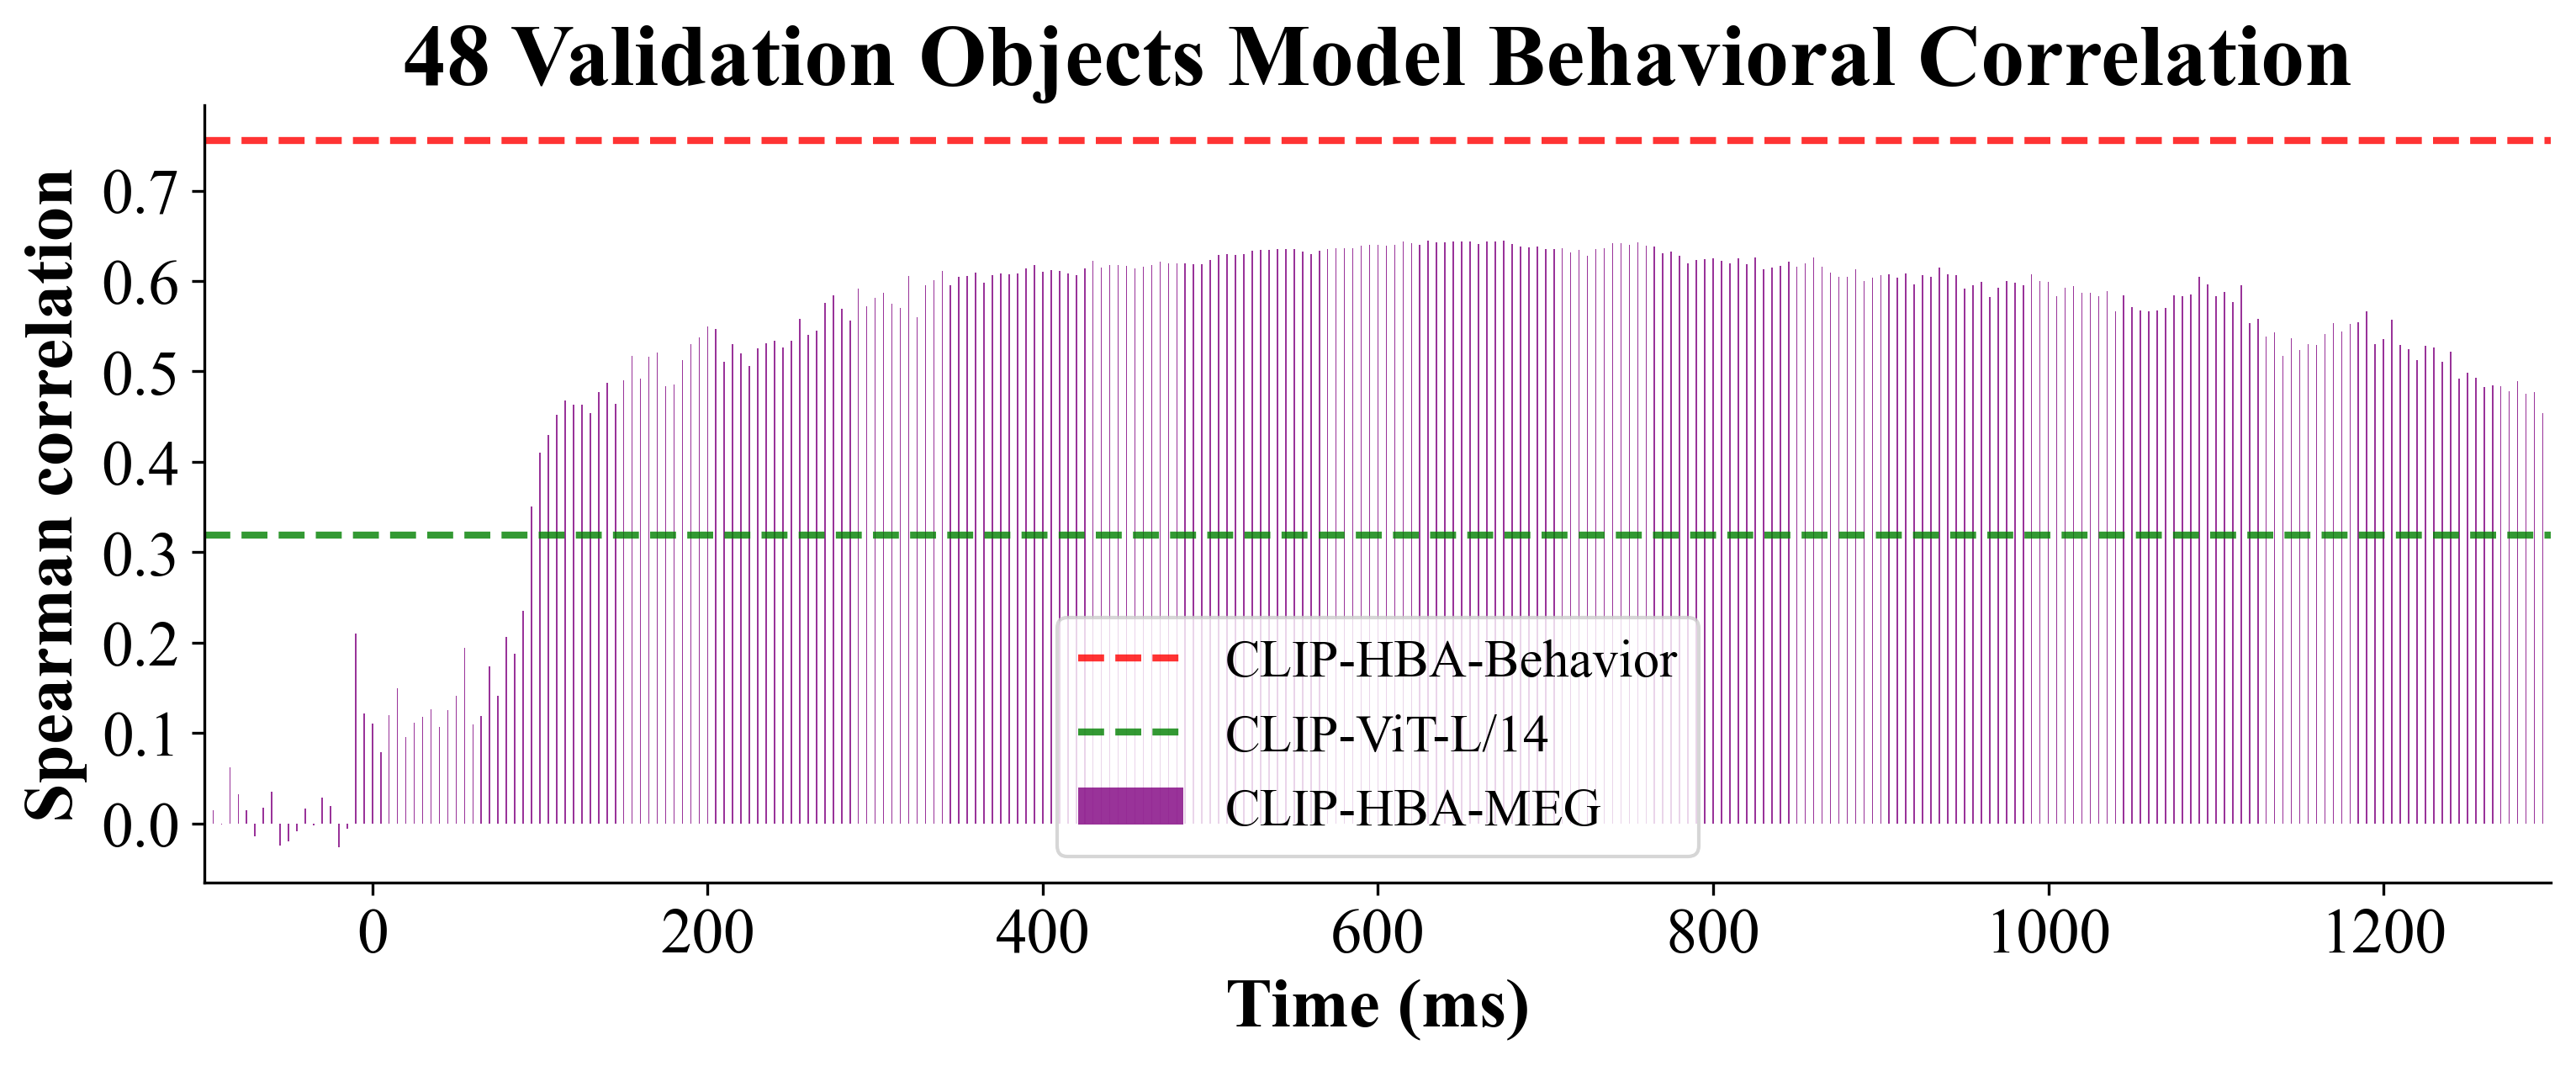

In [86]:
plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
plt.figure(figsize=(12, 4), dpi=300)

# Spose
spose48_rdm = np.array(loadmat("../Data/RDM48_triplet.mat")['RDM48_triplet'])
print(spose48_rdm.shape)

# HBA Dynamic
hba_dynamic_rdms_dir = '../../output/cliphba_dynamic_66d_official_v2/things48/rdms_-100ms-1300ms-5step.npy'
start = -100
step = 5
end = 1300

model_timepoints_list = np.arange(start, end+1, step)
hba_dynamic_rdms = load_dynamic_rdms(hba_dynamic_rdms_dir)
print(hba_dynamic_rdms.shape)

# HBA static
hba_static_rdm_path = "../../output/cliphba_66d_official/things48/rdm/static_rdm.hdf5"
with h5py.File(hba_static_rdm_path, 'r') as f:
    hba_static_rdm = f['rdm'][:]
print(hba_static_rdm.shape)

# Baseline static
baseline_static_rdm_path = "../../output/baseline_static_vit/things48/rdm/static_rdm.hdf5"
with h5py.File(baseline_static_rdm_path, 'r') as f:
    baseline_static_rdm = f['rdm'][:]
print(baseline_static_rdm.shape)



# reorder the rdm to match the order of the sample48

sample48 = pd.DataFrame(loadmat("../Data/words48.mat")['words48'])
sample48 = sample48.astype(str).apply(lambda x: x.str.strip('[]'))
sample48 = sample48.applymap(lambda x: x[1:-1])
sample48 = sample48.replace(' ', '_', regex=True)
sample48 = sample48.replace('camera', 'camera1', regex=True)
sample48 = sample48.replace('file', 'file1', regex=True)

order_list = list(sample48[0])


name_df = pd.read_csv("../Data/things48_image_names.csv")
name_df['image_name'] = name_df['image_name'].apply(lambda x: x[:-8])

# find list of index from name_df basedo nn sample48
index_list = []
for i in range(48):
    index_list.append(name_df[name_df['image_name'] == order_list[i]].index[0])

hba_static_rdm = hba_static_rdm[index_list][:, index_list]
baseline_static_rdm = baseline_static_rdm[index_list][:, index_list]
hba_dynamic_rdms = hba_dynamic_rdms[:, index_list][:, :, index_list]




# compute correlations
hba_static_correlation = compute_static_behavioral_correlation(hba_static_rdm, spose48_rdm)
hba_dynamic_correlations = compute_dynamic_behavioral_correlation(hba_dynamic_rdms, spose48_rdm)
baseline_static_correlation = compute_static_behavioral_correlation(baseline_static_rdm, spose48_rdm)

# Remove top and right frame
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('48 Validation Objects Model Behavioral Correlation', fontsize=25, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Plotting
plt.bar(model_timepoints_list, hba_dynamic_correlations, label='CLIP-HBA-MEG', color='purple', alpha=0.8)
print("max dynamic correlation", np.max(hba_dynamic_correlations))
plt.axhline(hba_static_correlation, label='CLIP-HBA-Behavior', color='red', linestyle='--', alpha=0.8, linewidth=2)
plt.axhline(baseline_static_correlation, label='CLIP-ViT-L/14', color='green', linestyle='--', alpha=0.8, linewidth=2)
plt.xlabel('Time (ms)', fontsize=20, fontweight='bold')
plt.ylabel('Spearman correlation', fontsize=20, fontweight='bold')
plt.legend(fontsize=15, loc='lower center')

plt.xlim(-100, 1300)


# plt.show()
plt.savefig('../figures/dynamic_behavioral_alignment_sample48.svg', format='svg', dpi=300, bbox_inches='tight', transparent=True)

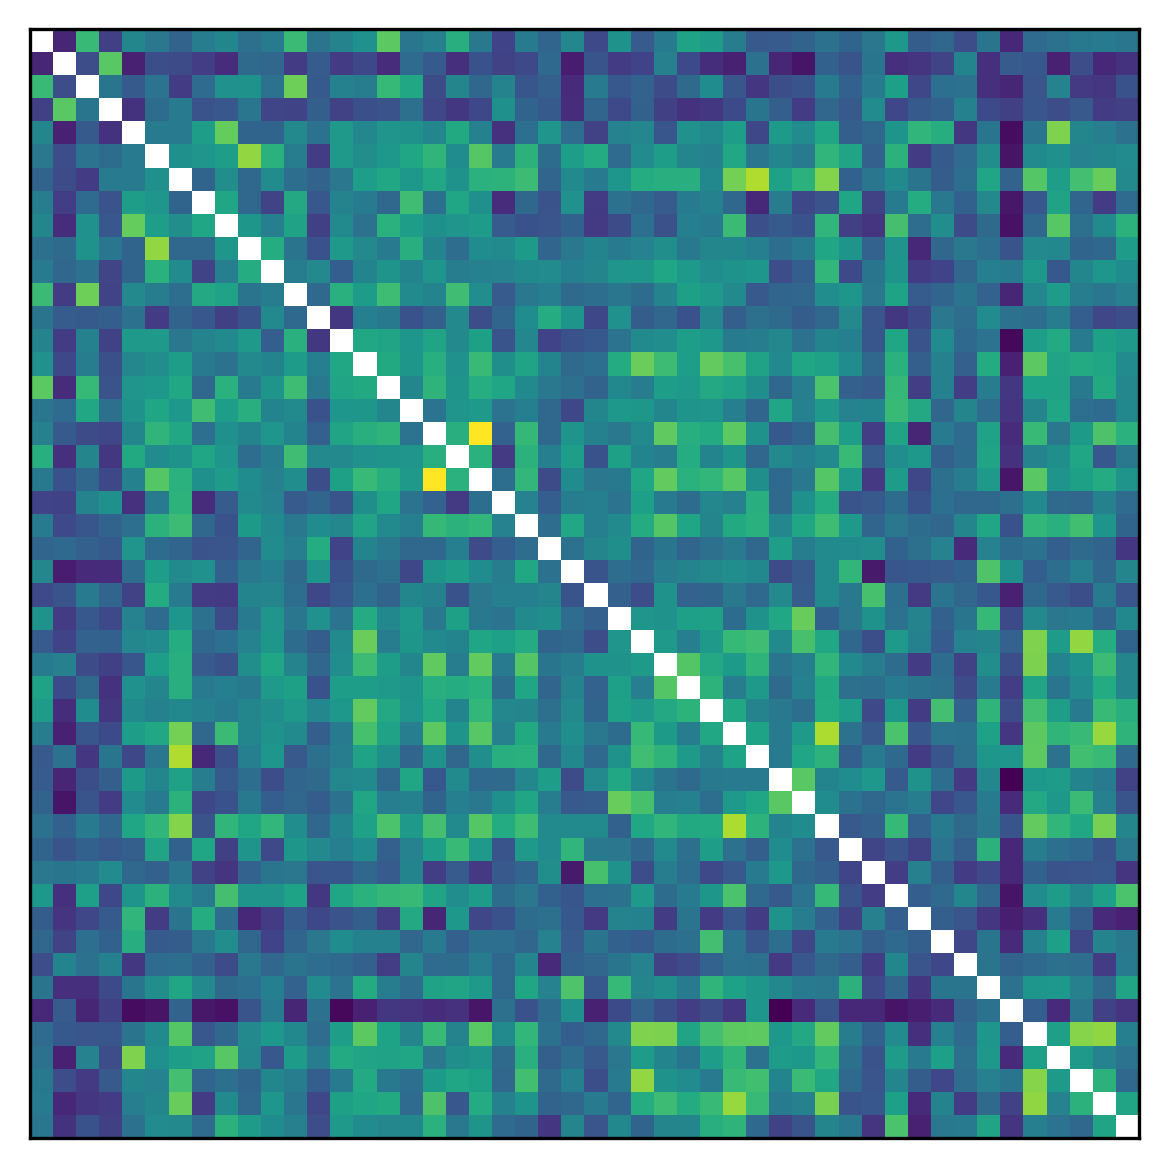

In [87]:
fig, ax = plt.subplots(dpi=300)  # Create a new figure and axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)
fig.patch.set_facecolor('none')  # Set the figure facecolor to none
# ax.set_facecolor('none')  # Set the axes facecolor to none


select_timepoints = [0, 50, 100]
for i in range(len(select_timepoints)):
    rdm_plot = hba_dynamic_rdms[select_timepoints[i]]
    np.fill_diagonal(rdm_plot, np.nan)
    plt.imshow(rdm_plot, cmap='viridis_r')
    plt.savefig(f'../figures/dynamic_rdm_sample48_{i}.svg', format='svg', dpi=300, bbox_inches='tight')
